In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Loading data
# Charger les données
df = pd.read_csv("../data/inventors_gender_birth.csv")

# Convertir la date de naissance en datetime
df['birth'] = pd.to_datetime(df['birth'], errors='coerce')

# Supprimer les lignes avec NaT (dates manquantes ou invalides)
df = df.dropna(subset=['birth'])

# Ajouter une colonne décennie
df['decade'] = (df['birth'].dt.year // 10) * 10


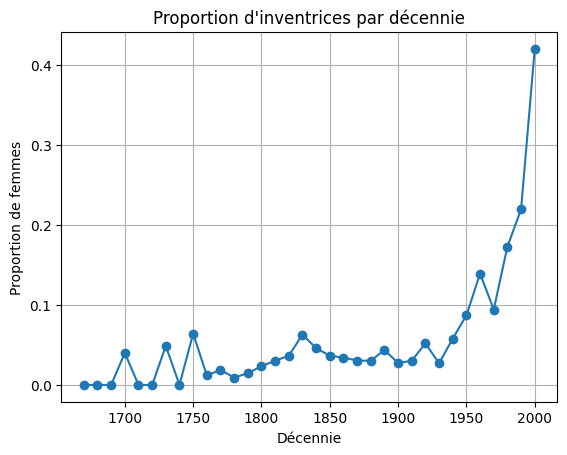

In [3]:
# Regrouper par décennie et genre
grouped = df.groupby(['decade', 'genderLabel']).size().unstack(fill_value=0)

# Calculer la proportion de femmes
grouped['total'] = grouped.sum(axis=1)
grouped['proportion_femmes'] = grouped.get('féminin', 0) / grouped['total']

# Tracer
grouped['proportion_femmes'].plot(kind='line', marker='o', title="Proportion d'inventrices par décennie")
plt.ylabel("Proportion de femmes")
plt.xlabel("Décennie")
plt.grid(True)
plt.show()
